# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

Submitted by - Nitin Bhatnagar

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week 5: Project 1 - FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Code to show the shape of data source. it shows rows and column
df.shape

(1898, 9)

#### Observations: This code line helps us to understand the table structure, in this case, the CSV file which we provided contains 1898 Rows with 9 attributes for each records (or Columns)


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Oberservations: The data set contains 9 columns such as order_id, rating etc, looking at the number of non null counts of each columns, the are NO missing details in all the column, ther are 3 distinct data types.


*   order_id, customer_id, food_preperation_time, delivery_time are all **int64**
* restaurant_name, cuisine_type, day_of_the_week, rating are all **object**
* cost_of_the_order is of type **float64**










### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [1]:
# No there are NO missing values/ data in the data set.

#### Observations:

If we take a close look, there are no missing values as the number of non null values for each of the data category is equal to 1898.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# we will use describe() to print statical data for our csv
df.describe( )


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

Based on the statistical data displayed while using df.describe() function, we can see that food_preparation_time column has 1898 enteries with a
* min= 20 Mins
* mean (average) = 27.37 Mins
* max= 35 Mins

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# find out the unique values in the data set
print (df['rating'].unique())
# list the count of records which have ratings== Not given
(df['rating'] == "Not given").sum()

['Not given' '5' '3' '4']


736

#### Observations:

using the unique and sum function on data frame, we found out that there are **736** cells with the value **Not given** meaning no rating available

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

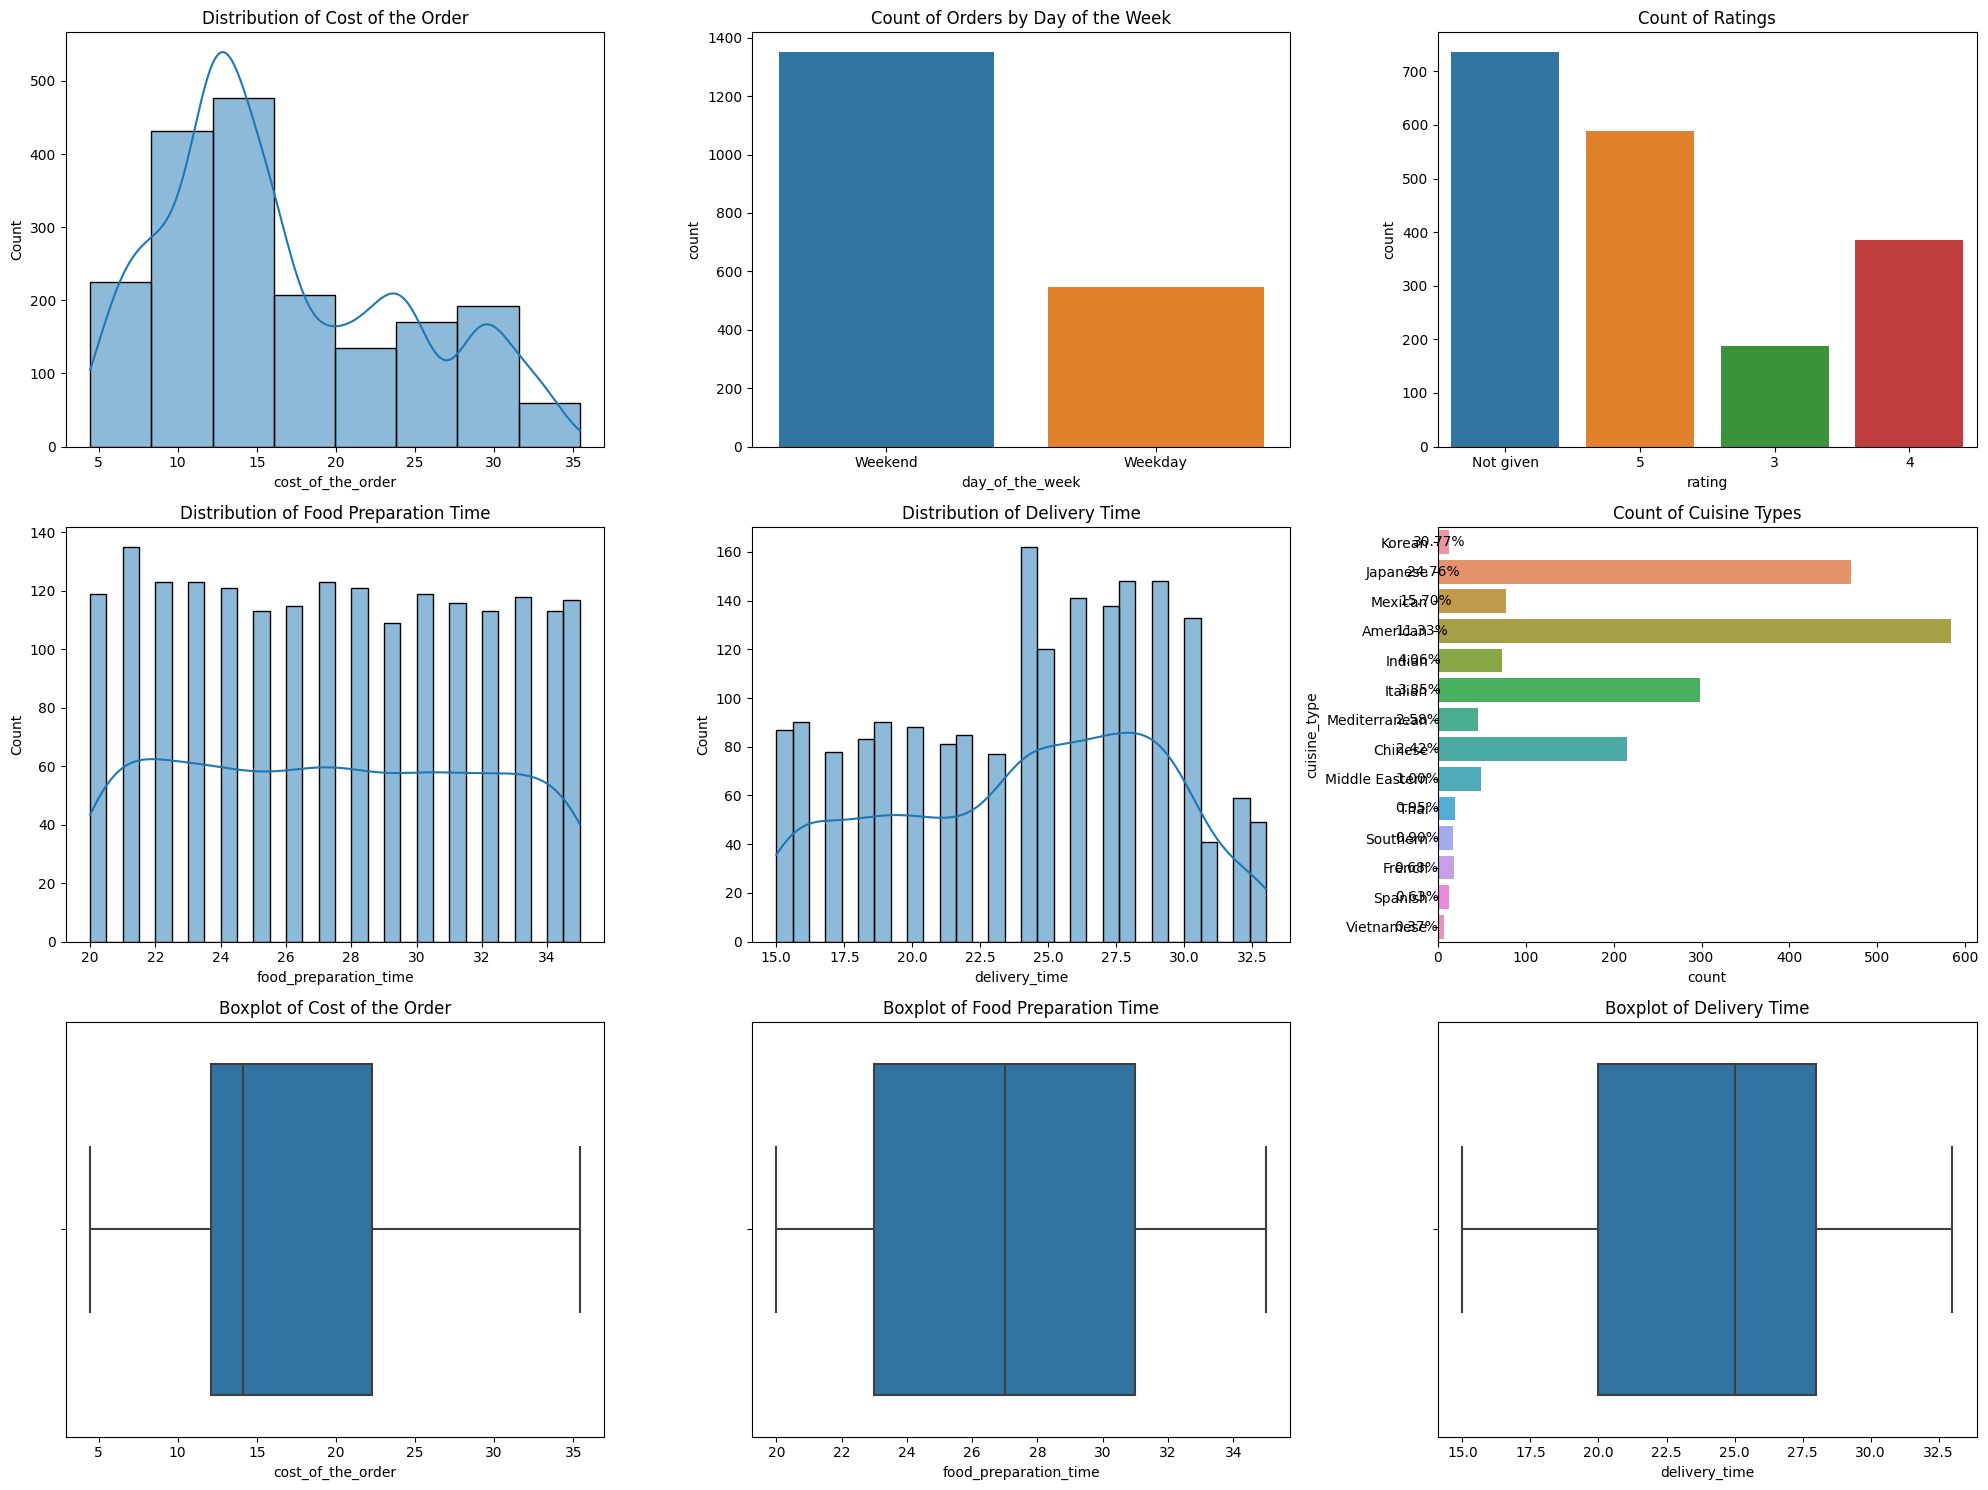

In [24]:

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Plotting histograms and countplots for each variable
sns.histplot(df['cost_of_the_order'], bins=8, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Cost of the Order')

sns.countplot(x='day_of_the_week', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Count of Orders by Day of the Week')

sns.countplot(x='rating', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Count of Ratings')

sns.histplot(df['food_preparation_time'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Food Preparation Time')

sns.histplot(df['delivery_time'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Delivery Time')

#sns.countplot(y='cuisine_type', data=df, ax=axes[1, 2])
#axes[1, 2].set_title('Count of Cuisine Types')





# Calculate the percentage of orders for each cuisine type
cuisine_percentages = df['cuisine_type'].value_counts(normalize=True) * 100

# Create the plot
sns.countplot(y='cuisine_type', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Count of Cuisine Types')

# Annotate each bar with the percentage
for index, value in enumerate(cuisine_percentages):
    label = f'{value:.2f}%'  # Format the label correctly
    axes[1, 2].text(cuisine_percentages[index], index, label, ha='right', va='center')








sns.boxplot(x='cost_of_the_order', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Boxplot of Cost of the Order')

sns.boxplot(x='food_preparation_time', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Boxplot of Food Preparation Time')

sns.boxplot(x='delivery_time', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Boxplot of Delivery Time')


# Adjust layout for better readability
plt.tight_layout()
plt.show()


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64


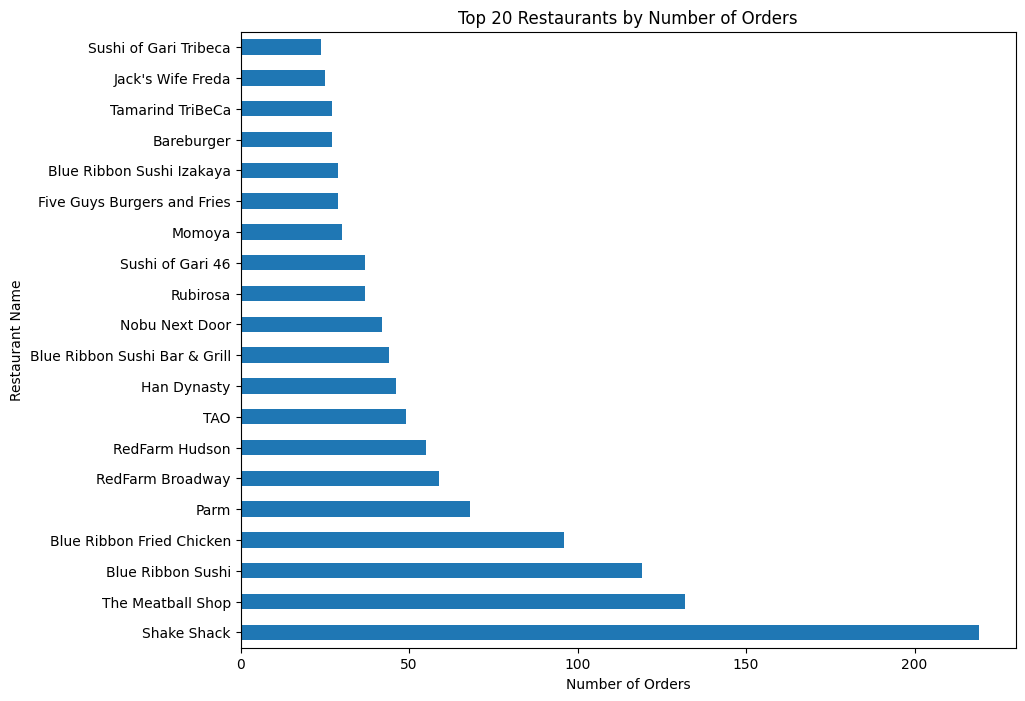

In [20]:
# Count of Orders per Restaurant
restaurant_order_counts = df['restaurant_name'].value_counts()
print(restaurant_order_counts)
# Since there might be a large number of restaurants, we'll visualize the top 20
plt.figure(figsize=(10, 8))
restaurant_order_counts.head(20).plot(kind='barh')
plt.title('Top 20 Restaurants by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

Observations:
* Cost of the Order:
The histogram shows a right-skewed distribution, suggesting most orders are on the lower end of the cost spectrum.
The boxplot reveals some outliers with unusually high order costs, indicating a few orders are significantly more expensive than the majority.
* Day of the Week:
The countplot shows the frequency of orders on weekdays versus weekends. This provides insight into the popularity of ordering on different days.
* Rating:
The countplot for ratings displays the frequency of each rating category, including those orders that were not rated. It shows a significant number of orders are not rated.
* Food Preparation Time:
The histogram indicates a roughly normal distribution for food preparation time, with most times clustering around a central value.
The boxplot shows the spread and potential outliers in preparation times, suggesting most orders have a similar preparation time with a few exceptions.
* Delivery Time:
The histogram for delivery time appears to be roughly normal, indicating a consistent delivery time for most orders.
The boxplot illustrates the range and outliers in delivery times, indicating most deliveries fall within a similar timeframe with some variations.
* Cuisine Type:
The countplot for cuisine types shows the frequency of different cuisine types ordered, highlighting which cuisines are more popular in the dataset.
* The last bar chart shows the top 20 restaurants in terms of the number of orders received. This indicates the popularity of these restaurants among customers based on order frequency.
Restaurants at the top of this chart have a higher number of orders, suggesting they are more frequently chosen by customers.

I did not analyze order id, cusotmer id.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

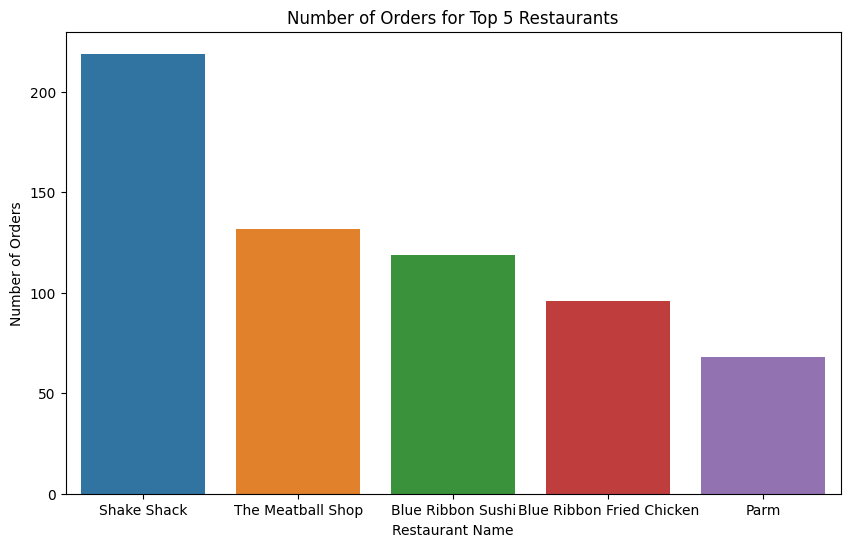

In [ ]:
# to get the number of orders for the top 5 restaurants
top_5_orders = df['restaurant_name'].value_counts().head(5)

# Create a histogram for the number of orders for the top 5 restaurants
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_orders.index, y=top_5_orders.values)
plt.title('Number of Orders for Top 5 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
using barplot, we can plot any number of top restaurants, here we can see that Shake Shack tops the list with over 200 total orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
## to get the number of orders for the top 5 restaurants
weekend_data = df[df['day_of_the_week'] == 'Weekend']
top_cusine = weekend_data['cuisine_type'].value_counts().head(1)
top_cusine


American    415
Name: cuisine_type, dtype: int64

#### Observations:
I created a df with weekend data, and then got the top cuisine from all the orders placed on weekend.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Calculating the percentage of orders that cost more than 20 dollars
total_orders = df.shape[0]
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]
percentage_above_20 = (orders_above_20 / total_orders) * 100

print("Total Entries =", total_orders, "\nOrders over $20 =", orders_above_20, "\n% of orders over $20 =", percentage_above_20)


Total Entries = 1898 
Orders over $20 = 555 
% of orders over $20 = 29.24130663856691


#### Observations:

to solve this problem, we need two data points. 1. total orders (which we know are 1878) and then the number of orders greater than $20 in all orders.

total_orders = df.shape[0]  gives me the total number of rows in the complete data set.

orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0] gives me the count of filtered dataframe which have all the enteries >$20


### **Question 10**: What is the mean order delivery time? [1 mark]

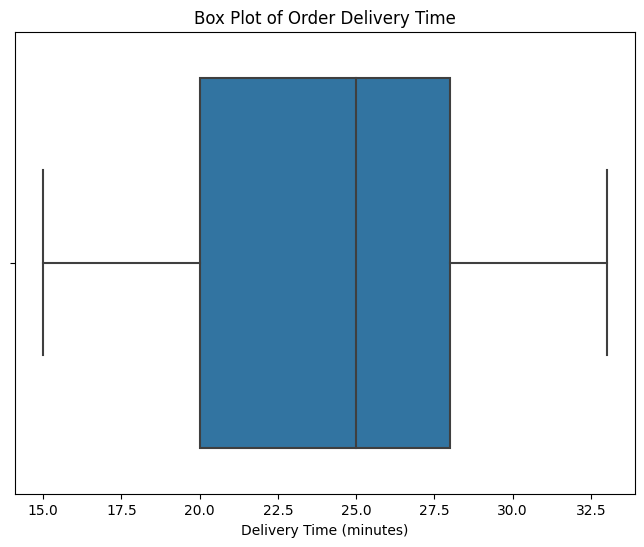


Calculated Mean Delivery Time = 24.161749209694417


In [ ]:
# Calculating the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

# Creating a box plot for delivery time
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['delivery_time'])
plt.title('Box Plot of Order Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

print ("\nCalculated Mean Delivery Time =", mean_delivery_time)

#### Observations:
We can get the univatiate analysis for deelivery time in two ways.
1. using box plot= which shows that the mean (50%) line in the middle of box at very close to 25
2. using an arithmatic function- which shows that the mean is 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
top_3_customers = df['customer_id'].value_counts().head(3)
top_3_customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
simplest way to get the top 3 cusotmers.
the three customer ids are
* 52832    13
* 47440    10
* 83287     9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


For the multivariate analysis, i will use the following scenarios
1. how is the weekend vs weekday orders NUMBER looks like
2. how is the weekend vs weekday orders COST like
3. Analyze Cusine type wrt to the time to cook and the cost of order
4. analyze rating to the average delivery time
5. finally a corr graph betweeen numberical valuees to understand the correlation beteen them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


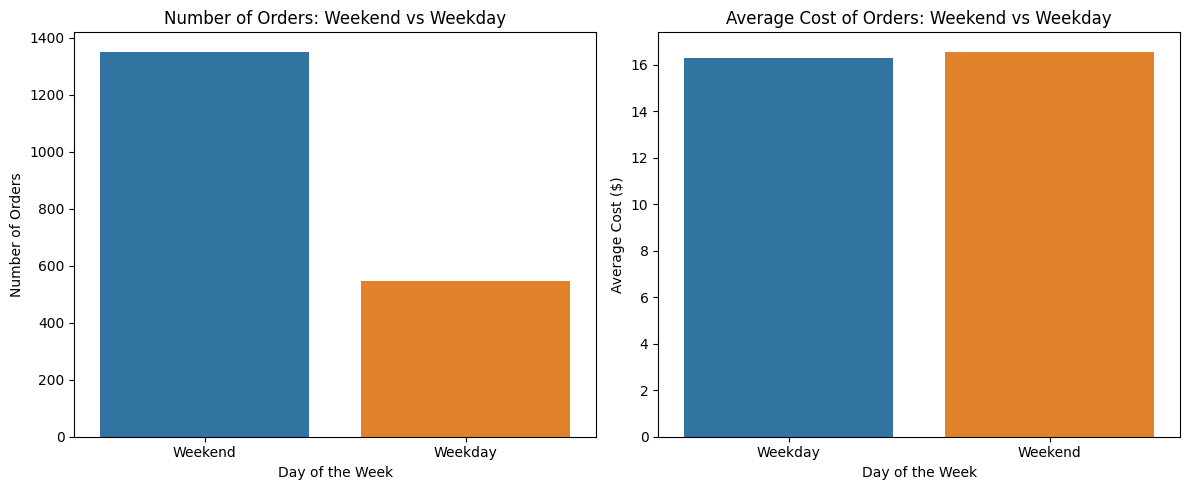

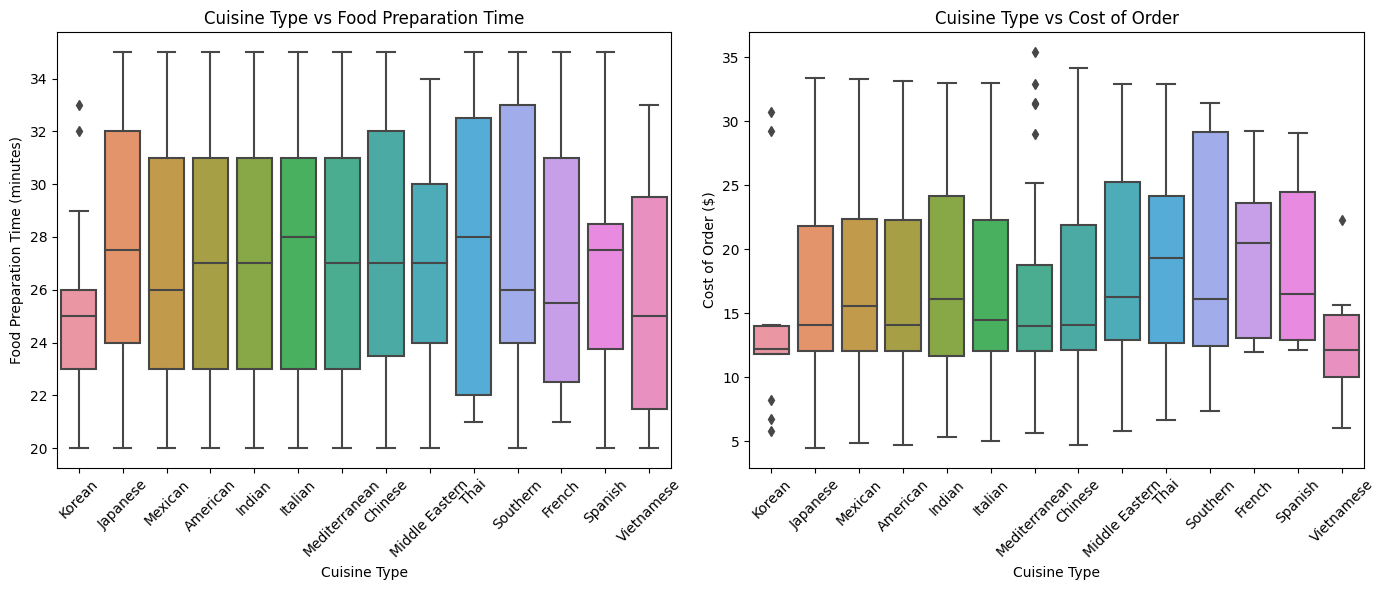

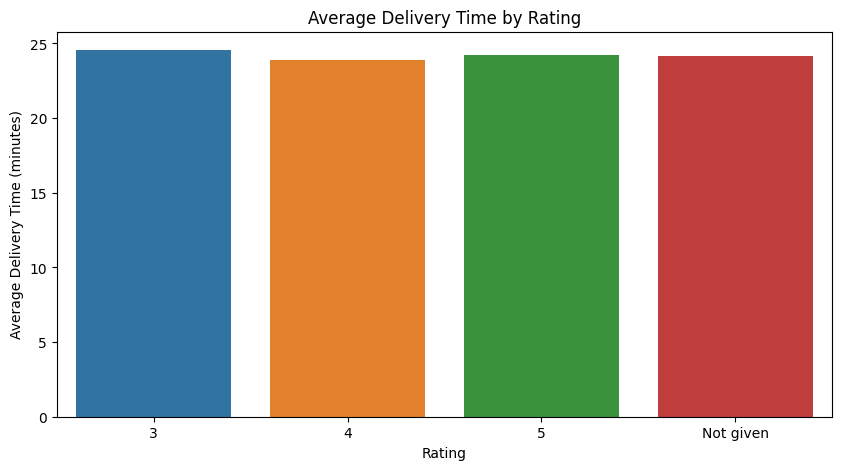

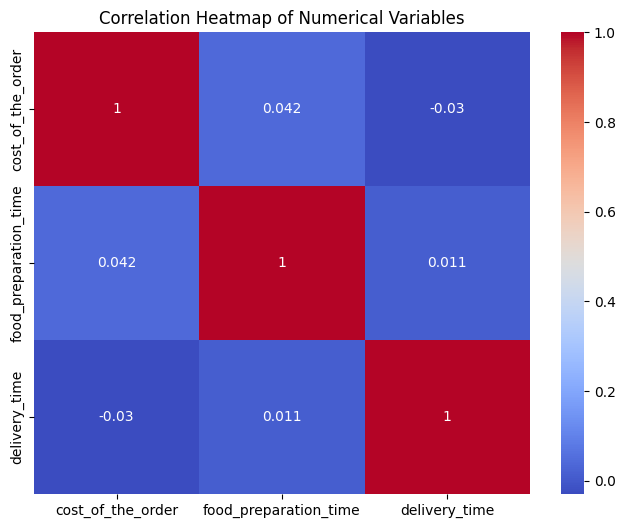

In [ ]:
# 1. Weekend vs Weekday Orders (Number)
orders_weekend_vs_weekday_count = df['day_of_the_week'].value_counts()

# 2. Weekend vs Weekday Orders (Cost)
average_cost_weekend_vs_weekday = df.groupby('day_of_the_week')['cost_of_the_order'].mean()

# Plotting the results for 1 and 2
plt.figure(figsize=(12, 5))

# Plot for number of orders
plt.subplot(1, 2, 1)
sns.barplot(x=orders_weekend_vs_weekday_count.index, y=orders_weekend_vs_weekday_count.values)
plt.title('Number of Orders: Weekend vs Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Plot for average cost
plt.subplot(1, 2, 2)
sns.barplot(x=average_cost_weekend_vs_weekday.index, y=average_cost_weekend_vs_weekday.values)
plt.title('Average Cost of Orders: Weekend vs Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Cost ($)')
plt.tight_layout()
plt.show()

# 3. Analyze Cuisine type wrt to the time to cook and the cost of order
plt.figure(figsize=(14, 6))

# Box plot for cuisine and time to cook
plt.subplot(1, 2, 1)
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=45)
plt.title('Cuisine Type vs Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (minutes)')

# Box plot for cuisine and cost of order
plt.subplot(1, 2, 2)
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.title('Cuisine Type vs Cost of Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order ($)')
plt.tight_layout()
plt.show()

# 4. Rating vs Average Delivery Time
average_delivery_time_by_rating = df.groupby('rating')['delivery_time'].mean()

# Plotting average delivery time by rating
plt.figure(figsize=(10, 5))
sns.barplot(x=average_delivery_time_by_rating.index, y=average_delivery_time_by_rating.values)
plt.title('Average Delivery Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Delivery Time (minutes)')
plt.show()

# 5. Correlation Graph
corr = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


* **Number of Orders** - Weekend vs Weekday:
The first bar plot shows the comparison of the number of orders placed on weekends and weekdays. This gives insight into which part of the week is busier for orders.
* **Average Cost of Orders** - Weekend vs Weekday:
The second bar plot compares the average cost of orders on weekends versus weekdays. This can indicate if there's a tendency for order values to be higher on certain days.
* **Cuisine Type Analysis** - Food Preparation Time and Cost of Order:
The box plots illustrate the relationship between different cuisine types and food preparation time, as well as the cost of orders. These plots show the median, spread, and outliers for both the time to cook and the cost, highlighting differences among various cuisines.
* **Rating vs Average Delivery Time:**
The bar plot for average delivery time by rating shows how delivery time varies across different ratings. This can reveal if higher-rated orders tend to have quicker or slower delivery times.
* **Correlation Heatmap of Numerical Variables:**
The heatmap provides a visual representation of the correlation between numerical variables (cost_of_the_order, food_preparation_time, delivery_time). It helps to understand the strength and direction of relationships between these variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:

# Filtering the dataset to exclude orders with 'Not given' ratings
rated_orders = df[df['rating'] != 'Not given']
rated_orders.info()
# Converting the 'rating' column to numeric for calculation
rated_orders['numeric_rating'] = pd.to_numeric(rated_orders['rating'])
rated_orders.info()
# Grouping by restaurant and calculating count of ratings and average rating
restaurant_ratings = rated_orders.groupby('restaurant_name').agg({'numeric_rating': ['count', 'mean']})

# Filtering restaurants with more than 50 ratings and an average rating greater than 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings['numeric_rating']['count'] > 50) &
                                          (restaurant_ratings['numeric_rating']['mean'] > 4)]

eligible_restaurants


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 90.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int6

<ipython-input-59-03d024fc11a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_orders['numeric_rating'] = pd.to_numeric(rated_orders['rating'])


numeric_rating          
                                   count      mean
restaurant_name                                   
Blue Ribbon Fried Chicken             64  4.328125
Blue Ribbon Sushi                     73  4.219178
Shake Shack                          133  4.278195
The Meatball Shop                     84  4.511905

#### Observations:
I followed the following steps to reach the results.
1. Filter our the rating with values Not given
2. Convert the remaining values to INT
3. Group by restaurant while calculating count of ratings and average rating
4. Filtering restaurants with more than 50 ratings and an average rating greater than 4
5. list all the restaurant with count and the average ratings


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculating the revenue for orders
# 25% on orders greater than 20 dollars
revenue_above_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

# 15% on orders greater than 5 dollars but less than or equal to 20 dollars
revenue_5_to_20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

# Total net revenue generated by the company across all orders

print("Revenue from Orders over $20 is $",revenue_above_20,
      "\nRevenue from Orders between $5 and $20 is $",revenue_5_to_20,
      "\nTotal Revenue is $",revenue_above_20 + revenue_5_to_20)


Revenue from Orders over $20 is $ 3688.7275 
Revenue from Orders between $5 and $20 is $ 2477.5755000000004 
Total Revenue is $ 6166.303


#### Observations:
Logic applied: create two DFs,
- one with the finding the orders cost over $20 and multiply it with 0.25
- Other for orders which totaled more than 5 but were under 20 (or equal) and multiply it with 0.15
- The I have revenue from two segments, to get the complete revenue, simply added both these numbers to get the whole numbers.
- List the total revenue.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
orders_over_60_minutes = df[df['total_delivery_time'] > 60].shape[0]
total_orders = df.shape[0]
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100
print ("the percentage is", percentage_over_60_minutes, "%")
print("Percentage of orders taking more than 60 minutes: {:.2f}%".format(percentage_over_60_minutes))



the percentage is 10.537407797681771 %
Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
Logic
1. First calculate Total Delivery Time by adding food_preparation_time and delivery_time
2. Count Orders Taking More Than 60 Minutes
3. Calculate the Percentage by dividing the count of orders taking more than 60 minutes by the total number of orders and multiply by 100 to get the percentage
4. print the %


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

Conclusion
* **Favorite Foods:**
American food is really popular, especially on weekends.
* **Best-Rated Restaurants:**
Some restaurants get a lot of good reviews. They're liked a lot and have more than 50 good ratings.
* **Making Money from Expensive Orders:**
The business earns more when people order food that costs more than $20.
* **Long Delivery Times:**
A lot of orders take more than an hour to reach customers.
* **Different Foods Take Different Times to Cook:**
Some types of food take longer to cook and cost more than others.
* **Happy Customers with Fast Delivery:**
If food is delivered fast, customers might give better reviews.

### Recommendations:

* **Advertise Popular Food and Top Restaurants:**
Talk more about the foods people love and restaurants with great reviews, especially when it's busy, like on weekends.
* **Encourage Big Orders:**
Offer special deals to make people want to order more expensive meals.
* **Speed Up Deliveries:**
Find ways to deliver food faster, like finding the best routes or working with good delivery services.
* **Tell Customers About Cooking Times:**
Let people know if their food might take a while to cook, so they understand why it takes time.
* **Listen to Feedback:**
Always check what customers are saying to see how to make things better.
* **Use Data to Make Decisions:**
Keep an eye on what customers like and change things accordingly.

In [ ]:
# prompt: how to convert this ipynb to html

!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Week 5: Project 1 - FoodHub/PYF_Project_LearnerNotebook_FullCode.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Week 5: Project 1 - FoodHub/PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1250105 bytes to /content/drive/MyDrive/Colab Notebooks/Week 5: Project 1 - FoodHub/PYF_Project_LearnerNotebook_FullCode.html


---